<a href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Petites_experiences_avec_la_convolution.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rappel - Fonctionnement d'un carnet web iPython

* Pour exécuter le code contenu dans une cellule d'un carnet iPython, cliquez dans la cellule et faites (⇧↵, shift-enter) 
* Le code d'un carnet iPython s'exécute séquentiellement de haut en bas de la page. Souvent, l'importation d'une bibliothèque Python ou l'initialisation d'une variable est préalable à l'exécution d'une cellule située plus bas. Il est donc recommandé d'exécuter les cellules en séquence. Enfin, méfiez-vous des retours en arrière qui peuvent réinitialiser certaines variables.

# Petites expériences avec la convolution

Vous allez expérimenter l'application de filtres de convolution simples pour identifier des lignes horizontales et verticales et de contour. Dans un premier temps sur des images synthétiques puis sur une image de chevreuil faisant partie du jeu de données CIFAR-10. 

In [202]:
import numpy as np
import matplotlib.pyplot as plt

def convolution(image, filtre):
    # normalisation du filtre
    filtre_normal = filtre - filtre.mean()
    dim_filtre = filtre.shape[0]  
    representation = np.zeros([image.shape[0]-dim_filtre+1,
                               image.shape[1]-dim_filtre+1])
    # Balayage de l'image
    for ligne in range(image.shape[0]-2):
        for col in range(image.shape[1]-dim_filtre+1):
            # Calcul de la convolution
            representation[ligne, col] = np.sum(image[ligne:ligne+dim_filtre,
                                                col:col+dim_filtre]*filtre_normal)
    return representation

## Expérience avec de petites images synthétiques

### Détection de lignes verticales 

Concrètement, nous allons expérimenter avec une convolution capable de détecter (ou filtrer) des lignes verticales. Le filtre utilisé est un tableau 3 x 3 ayant une colonne de 1, suivie d’une colonne de 0 et d’une colonne de -1. 

    [[ +1.0,  +0.0, -1.0],
     [ +1.0,  +0.0, -1.0],
     [ +1.0,  +0.0, -1.0]]

Image synthétique:
 [[0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]]


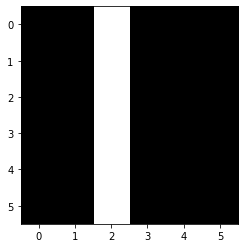

Filtre vertical:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Résultat convolution:
 [[-3.  0.  3.  0.]
 [-3.  0.  3.  0.]
 [-3.  0.  3.  0.]
 [-3.  0.  3.  0.]]


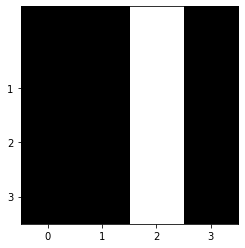

In [213]:
# image synthétique comportant une ligne verticale
image = np.array([[0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0]
                 ])

print("Image synthétique:\n",image)

plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

# Filtre pour reconnaître des lignes verticales dans une image
filtre = np.array([[ 1,  0, -1],
                   [ 1,  0, -1],
                   [ 1,  0, -1]])
print("Filtre vertical:\n",filtre)

resultat_convolution = convolution(image,filtre)
print("\nRésultat convolution:\n",resultat_convolution)

yint = range(1, 5)
plt.yticks(yint)
plt.imshow(resultat_convolution,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

### Détection de lignes horizontales 

De son côté, un filtre capable de détecter des lignes horizontales est simplement une transposition du filtre précédent. C'est-à-dire un tableau 3 x 3 ayant une ligne de 1, suivie d’une ligne de 0 et d’une ligne de -1.

    [[ +1.0, +0.0, -1.0],
     [ +1.0, +0.0, -1.0],
     [ +1.0, +0.0, -1.0]]

Image synthétique:
 [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 1 1 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


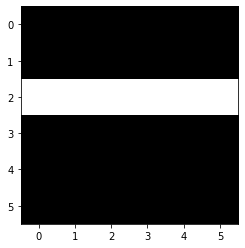


Filtre ligne horizontale:
 [[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]

Résultat convolution:
 [[-3. -3. -3. -3.]
 [ 0.  0.  0.  0.]
 [ 3.  3.  3.  3.]
 [ 0.  0.  0.  0.]]


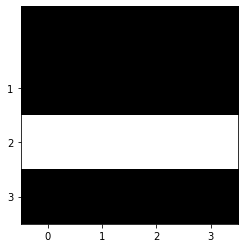

In [214]:
# image synthétique comportant une ligne verticale
image = np.array([[0,0,0,0,0,0],
                  [0,0,0,0,0,0],
                  [1,1,1,1,1,1],
                  [0,0,0,0,0,0],
                  [0,0,0,0,0,0],
                  [0,0,0,0,0,0],
                 ])

print("Image synthétique:\n",image)

plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

# Filtre pour reconnaître des lignes horizontales dans une image
filtre = np.array([[ +1.0, +1.0, +1.0],
                   [ +0.0, +0.0, +0.0],
                   [ -1.0, -1.0, -1.0]])
print("\nFiltre ligne horizontale:\n",filtre)

resultat_convolution = convolution(image,filtre)
print("\nRésultat convolution:\n",resultat_convolution)

yint = range(1, 5)
plt.yticks(yint)
plt.imshow(resultat_convolution,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

## Expériences avec une photo de chevreuil en tons de gris

Image source, taille (32, 32)


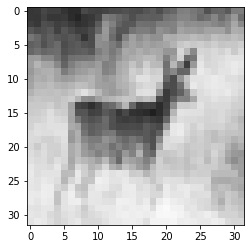

In [215]:
chemin_data = "https://cours.edulib.org/asset-v1:Cegep-Matane+VAERN.1FR+P2021+type@asset+block@"

# Image source
image = plt.imread(chemin_data+"Chevreuil-0621_rouge-blanc_noir.png")
print("Image source, taille",image.shape)

plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()


Filtre ligne verticale:
 [[ 1.  0. -1.]
 [ 1.  0. -1.]
 [ 1.  0. -1.]]


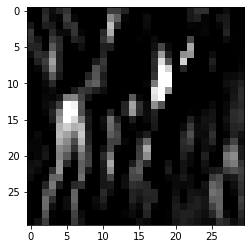

In [216]:
# Filtre ligne verticale
filtre = np.array([[ +1.0, +0.0, -1.0],
                   [ +1.0, +0.0, -1.0],
                   [ +1.0, +0.0, -1.0]])
print("\nFiltre ligne verticale:\n",filtre)

resultat_convolution = convolution(image,filtre)

plt.imshow(resultat_convolution,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()


**Note:** Le filtre de lignes verticales fait ressortir les pattes et ses oreilles du chevreuil. 


Filtre ligne horizontale:
 [[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]


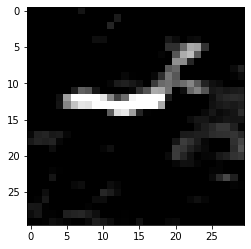

In [217]:
# Filtre ligne horizontale
filtre = np.array([[ +1.0, +1.0, +1.0],
                   [ +0.0, +0.0, +0.0],
                   [ -1.0, -1.0, -1.0]])
print("\nFiltre ligne horizontale:\n",filtre)

resultat_convolution = convolution(image,filtre)

plt.imshow(resultat_convolution,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

**Note:** Le filtre de lignes horizontales fait ressortir le dos du chevreuil.


Filtre : zone claire entourée de pixels plus foncés
 [[-1. -1. -1.]
 [-1.  1. -1.]
 [-1. -1. -1.]]


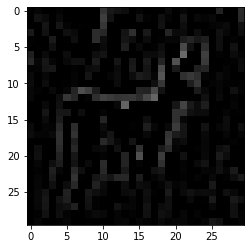

In [201]:
# Filtre : zone claire entourée de pixels plus foncés
filtre = np.array([[-1.0, -1.0, -1.0], 
                   [-1.0, +1.0, -1.0],
                   [-1.0, -1.0, -1.0]])
print("\nFiltre : zone claire entourée de pixels plus foncés\n",filtre)

resultat_convolution = convolution(image,filtre)

plt.imshow(resultat_convolution,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

**Note:** Le filtre pixel clair entouré de pixels foncés révèle le contour du chevreuil.

## Complément utile
Ci-dessous, une manipulation simple de l'image en y ajoutant un carré noir.

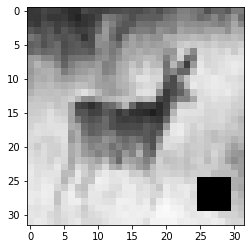

In [185]:
image[25:30,25:30]=0
plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()
